In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf

In [35]:
colnames=['timestamp', 'game_name', 'hourly_channels', 'hourly_viewership']
sully = pd.read_csv('data/Natasha.csv', names=colnames, header=None)

In [36]:
sully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092036 entries, 0 to 2092035
Data columns (total 4 columns):
timestamp            object
game_name            object
hourly_channels      int64
hourly_viewership    int64
dtypes: int64(2), object(2)
memory usage: 63.8+ MB


In [37]:
sully.describe()

,hourly_channels,hourly_viewership
count,2.092036e+06,2.092036e+06
mean,1.996948e+01,5.517764e+02
std,2.405983e+02,6.378626e+03
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00
50%,1.000000e+00,6.000000e+00
75%,4.000000e+00,3.100000e+01
max,4.169200e+04,7.039990e+05


In [38]:
sully['timestamp'] = pd.to_datetime(sully['timestamp'])

In [39]:
sully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092036 entries, 0 to 2092035
Data columns (total 4 columns):
timestamp            datetime64[ns]
game_name            object
hourly_channels      int64
hourly_viewership    int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 63.8+ MB


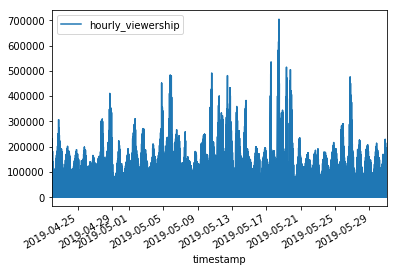

In [40]:
sully.plot.line(x = 'timestamp', y = 'hourly_viewership');

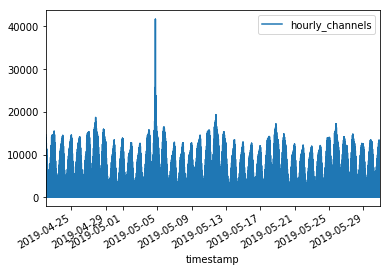

In [41]:
sully.plot.line(x = 'timestamp', y = 'hourly_channels');

In [44]:
trend_views = sully.groupby('game_name').mean().sort_values(by = 'hourly_viewership', ascending = False)

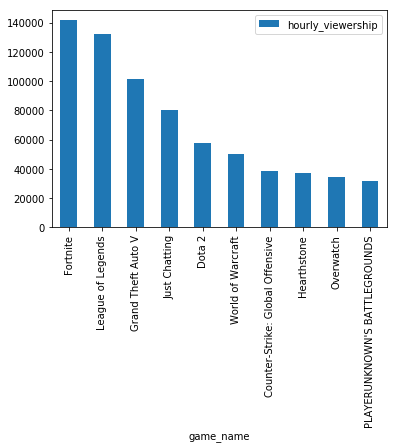

In [45]:
trend_views.head(10).plot.bar(y = 'hourly_viewership');

In [46]:
trend_channel = sully.groupby('game_name').mean().sort_values(by = 'hourly_channels', ascending = False)

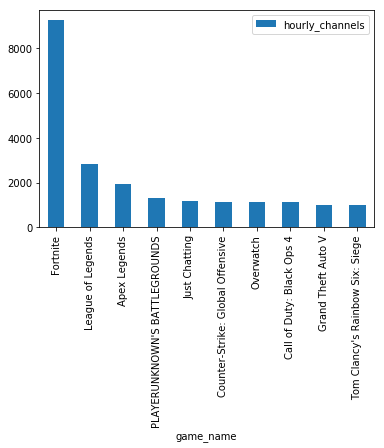

In [47]:
trend_channel.head(10).plot.bar(y = 'hourly_channels');

In [48]:
sully.sample()

,timestamp,game_name,hourly_channels,hourly_viewership
318869,2019-04-28,Fallout 3,2,7


In [49]:
trend_channel.sample()

,hourly_channels,hourly_viewership
game_name,,
Sticks,1.0,2.0


In [50]:
trend_views.sample()

,hourly_channels,hourly_viewership
game_name,,
Wii Play,1.0,2.21875


In [51]:
trend_channel['views_channels_ratio'] = trend_channel['hourly_viewership']/trend_channel['hourly_channels']

In [52]:
trend_channel.sort_values(by='views_channels_ratio', ascending=True, na_position ='last').head()

,hourly_channels,hourly_viewership,views_channels_ratio
game_name,,,
Sister Slave: Faithful Girl's Slave Training,1.0,0.0,0.0
Driving Simulator 2009,1.0,0.0,0.0
Worms Crazy Golf,1.0,0.0,0.0
Gakkou de atta Kowai Hanashi,1.0,0.0,0.0
World Series of Poker 2008: Battle for the Bracelets,1.0,0.0,0.0


In [53]:
#replace inf values with 0
trend_channel['views_channels_ratio'][trend_channel['views_channels_ratio'] == inf] = 0

In [61]:
trend_channel.sort_values(by=['views_channels_ratio'], ascending=False)

,hourly_channels,hourly_viewership,views_channels_ratio
game_name,,,
in My MIND.,1.000000,24306.000000,24306.000000
Decathlete,1.000000,9489.000000,9489.000000
The Spookening,1.666667,14431.666667,8659.000000
Hoshi wo Miru Hito,2.000000,16468.500000,8234.250000
Sleep Is Death,1.000000,7981.000000,7981.000000
Mashed: Drive to Survive,1.000000,5989.000000,5989.000000
Caveman World: Mountains of Unga Boonga,1.000000,5837.000000,5837.000000
Omega Labyrinth Z,1.000000,5163.285714,5163.285714
Defection,2.500000,11832.000000,4732.800000


In [55]:
#find a gap 
#aggregate by day, week, (40 days)
#for every week of FN, is the ratio growing or shrinking
#more viewers/fewer channels

In [56]:
#viewers by day 
